# **Pizza Place Sales**

Description of datasets
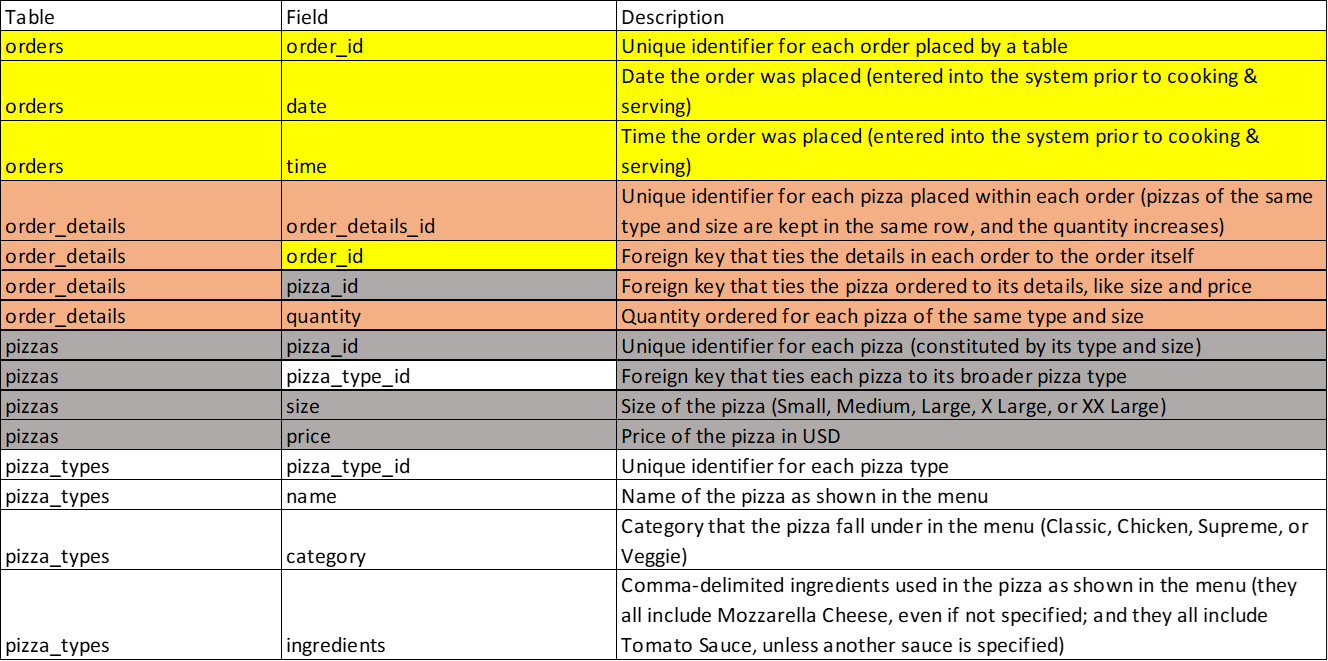

# Importing libraries

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing and Merging Datasets

In [4]:
#uploading datasets
df1 = pd.read_csv("/content/drive/MyDrive/Pizza+Place+Sales/pizza_sales/order_details.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Pizza+Place+Sales/pizza_sales/orders.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Pizza+Place+Sales/pizza_sales/pizzas.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Pizza+Place+Sales/pizza_sales/pizza_types.csv", encoding='latin-1')
df1.head(5)

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [5]:
df2.head(5)

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [6]:
df3.head(5)

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [7]:
df4.head(5)

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [8]:
#merging datasets
df = df1.merge(df2, on='order_id').merge(df3, on='pizza_id').merge(df4, on='pizza_type_id')
df.head(5)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


#EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [10]:
#checking for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [11]:
null_values = df.isnull().sum()
print(null_values)
print(df.isna().sum())

order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64
order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64


There are no duplicate rows and missing values

##converting date column

In [12]:
df['date'] = pd.to_datetime(df['date'])
df['date']

,date
0,2015-01-01
1,2015-01-01
2,2015-01-01
3,2015-01-01
4,2015-01-01
...,...
48615,2015-12-31
48616,2015-12-31
48617,2015-12-31
48618,2015-12-31


In [13]:
#extracting day of the week
df['day_of_week'] = df['date'].dt.day_name()
df['dayofweek'] = df['date'].dt.dayofweek
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=weekday_order, ordered=True)
df[['day_of_week','dayofweek','date']].sample(100)

,day_of_week,dayofweek,date
38862,Saturday,5,2015-10-17
41650,Sunday,6,2015-11-08
10052,Sunday,6,2015-03-15
23170,Saturday,5,2015-06-20
18111,Thursday,3,2015-05-14
...,...,...,...
30422,Wednesday,2,2015-08-12
18219,Thursday,3,2015-05-14
39076,Tuesday,1,2015-10-20
46928,Wednesday,2,2015-12-16


In [14]:
#extracting month
df['month'] = df['date'].dt.month_name()
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert to categorical for proper sorting
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True) # to sort month
df[['month','date']].sample(100)

,month,date
46002,December,2015-12-09
31842,August,2015-08-22
29733,August,2015-08-07
3393,January,2015-01-26
36946,October,2015-10-01
...,...,...
21573,June,2015-06-08
36283,September,2015-09-27
20550,June,2015-06-01
13042,April,2015-04-06


In [15]:
#extracting hour
df['hour'] = pd.to_datetime(df['time']).dt.hour
df[['hour','time']].sample(100)

<ipython-input-15-0841ddf910e3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time']).dt.hour


,hour,time
30246,14,14:33:09
32212,12,12:11:33
14623,12,12:21:56
914,14,14:56:26
168,12,12:01:12
...,...,...
4147,21,21:07:17
31129,16,16:58:07
10117,14,14:00:48
5248,16,16:28:40


Calculating sales

In [16]:
#caluting sales column    quantity x price
df['sales'] = df['quantity'] * df['price']
df[['quantity','price','sales']].sample(5)

,quantity,price,sales
24441,1,9.75,9.75
15712,1,16.75,16.75
34572,1,14.75,14.75
40112,1,12.75,12.75
2703,1,16.75,16.75


In [41]:
# Check for non-numeric values
print(df.info())
print(df.isna().sum())

# Handle missing values
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  object        
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
 12  day_of_week       48620 non-null  category      
 13  dayofweek         48620 non-null  int32         
 14  month             4862

#Answering Questions

In [17]:
df

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,day_of_week,dayofweek,month,hour,sales
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,3,January,11,13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",Thursday,3,January,11,16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",Thursday,3,January,11,18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",Thursday,3,January,11,20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",Thursday,3,January,11,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",Thursday,3,December,21,16.75
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",Thursday,3,December,21,17.95
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",Thursday,3,December,21,12.00
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",Thursday,3,December,22,20.25


##1.What is the total revenue/sales?

In [18]:
total_revenue = df['sales'].sum()
print(f"The total sales for The Pizza Place is $ {f'{total_revenue:,}'}")

The total sales for The Pizza Place is $ 817,860.05


The total sales for The Pizza Place is $ 817,860.05

##2. What is the total quantity sold?

In [19]:
total_quantity_sold = df['quantity'].sum()
print(f"The Pizza Place sold {f'{total_quantity_sold:,}'} pizzas")

The Pizza Place sold 49,574 pizzas


The Pizza Place sold 49,574 pizzas

##3. What are the total orders?

In [20]:
total_orders = len(df)
print(f"Pizza Place received {f'{total_orders:,}'} orders")

Pizza Place received 48,620 orders


Pizza Place received 48,620 orders

##4. How many pizza type do they sell?

In [21]:
list_pizza_type = df["pizza_type_id"].unique() #to get list of unique pizza type before using len to find number
number_pizza_type = len(list_pizza_type)
print(f"There are {number_pizza_type} types of pizzas sold by Pizza Place")

There are 32 types of pizzas sold by Pizza Place


There are 32 types of pizzas sold by Pizza Place

##5. What are the average price of the pizzas?

In [22]:
Average_pizza_price_by_type = df.groupby('pizza_type_id')['price'].mean().reset_index()
print(Average_pizza_price_by_type)

   pizza_type_id      price
0        bbq_ckn  17.572934
1       big_meat  12.000000
2     brie_carre  23.650000
3      calabrese  17.005124
4       cali_ckn  17.448523
5    ckn_alfredo  17.121429
6      ckn_pesto  17.153746
7    classic_dlx  15.575952
8    five_cheese  18.500000
9    four_cheese  16.951946
10  green_garden  14.001520
11      hawaiian  13.317194
12   ital_cpcllo  17.426803
13     ital_supr  17.769740
14   ital_veggie  16.339231
15  mediterraneo  16.427952
16      mexicana  18.024038
17    napolitana  16.437285
18   pep_msh_pep  13.865127
19     pepperoni  12.468658
20  peppr_salami  17.637834
21    prsc_argla  16.582458
22      sicilian  15.963831
23   soppressata  17.077064
24    southw_ckn  18.080504
25    spicy_ital  18.104663
26    spin_pesto  16.079676
27   spinach_fet  16.076292
28  spinach_supr  16.089362
29      thai_ckn  18.286069
30     the_greek  20.035633
31    veggie_veg  15.979967


##6. What are the peak hours of sales?

hour
12    111877.90
13    106065.70
18     89296.85
17     86237.45
19     72628.90
16     70055.40
Name: sales, dtype: float64


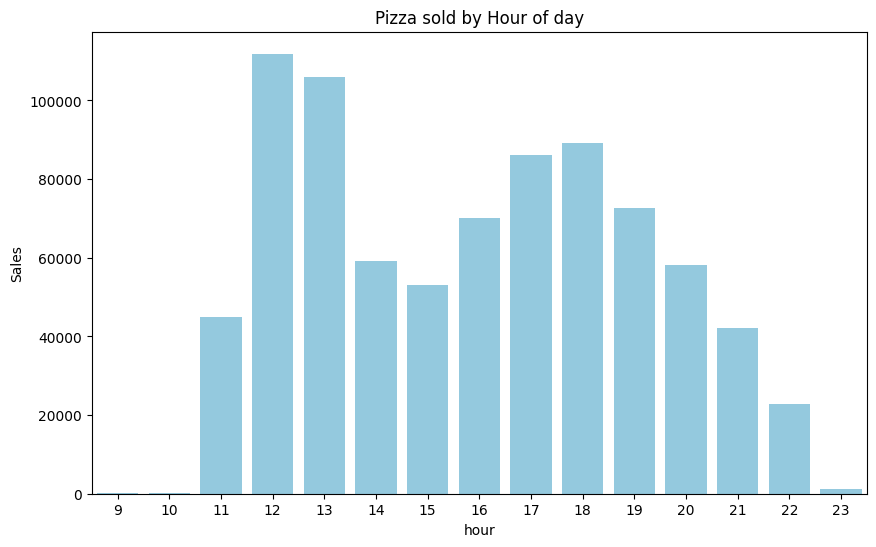

In [23]:
Peak_sales_hours = df.groupby('hour')['sales'].sum().sort_values(ascending = False)
print(Peak_sales_hours.head(6)) # showing top 6 hours
#plot bar graph to show results
plt.figure(figsize = (10,6))
sns.barplot(data = Peak_sales_hours, color = 'skyblue')
plt.ylabel('Sales')
plt.title('Pizza sold by Hour of day')
plt.show()

Peak hours of sales are in two phases,

1. from 12 noon to 2 pm presumably during lunch

2. from 4pm to 7pm for light dinner takeouts

##7. Total Sales on each day of the week

<ipython-input-52-f6a6530337a5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_day = df.groupby('day_of_week')['sales'].sum()


                 sales  percentage
day_of_week                       
Friday       136073.90        16.6
Thursday     123528.50        15.1
Saturday     123182.40        15.1
Wednesday    114408.40        14.0
Tuesday      114133.80        14.0
Monday       107329.55        13.1
Sunday        99203.50        12.1


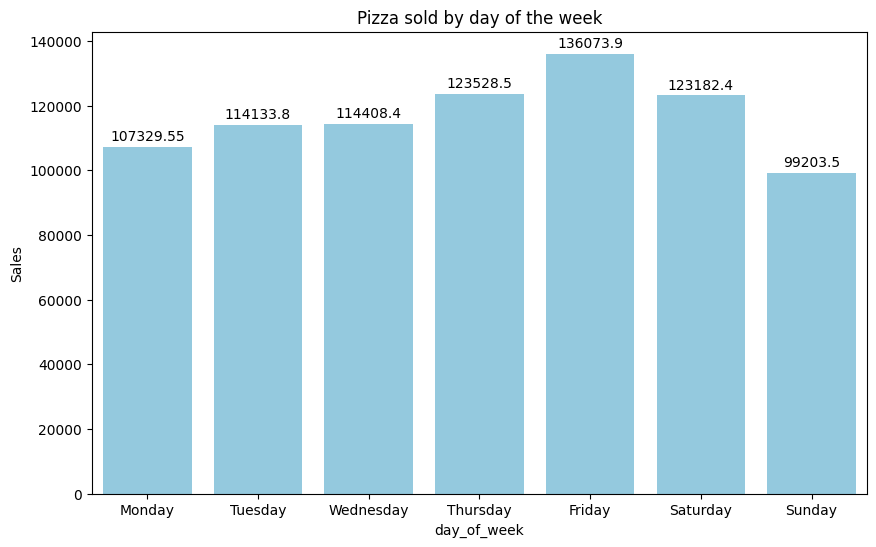

In [52]:
  sales_by_day = df.groupby('day_of_week')['sales'].sum()
  sales_day_percent = (sales_by_day/total_revenue * 100).round(1)
  day_analysis = pd.DataFrame({
    'sales': sales_by_day,
    'percentage': (sales_by_day / total_revenue * 100).round(1)}).sort_values('sales', ascending=False)
  print(day_analysis) # showing sale per day of week
  #plot bar graph to show results
  plt.figure(figsize = (10,6))
  sns.barplot(data = sales_by_day, color = 'skyblue')
  plt.ylabel('Sales')
  plt.title('Pizza sold by day of the week')
  for i, value in enumerate(sales_by_day):
    plt.text(i, value +2000, str(value), ha = 'center')
  plt.show()

From the graph, Friday is the day with the highest sales with 16.6%

##8. Top 5 bestselling pizzas

The five bestselling pizzas are: 
['The Thai Chicken Pizza', 'The Barbecue Chicken Pizza', 'The California Chicken Pizza', 'The Classic Deluxe Pizza', 'The Spicy Italian Pizza']

With their sales percentages:
                            name     sales  percentage
30        The Thai Chicken Pizza  43434.25         5.3
0     The Barbecue Chicken Pizza  42768.00         5.2
4   The California Chicken Pizza  41409.50         5.1
7       The Classic Deluxe Pizza  38180.50         4.7
26       The Spicy Italian Pizza  34831.25         4.3


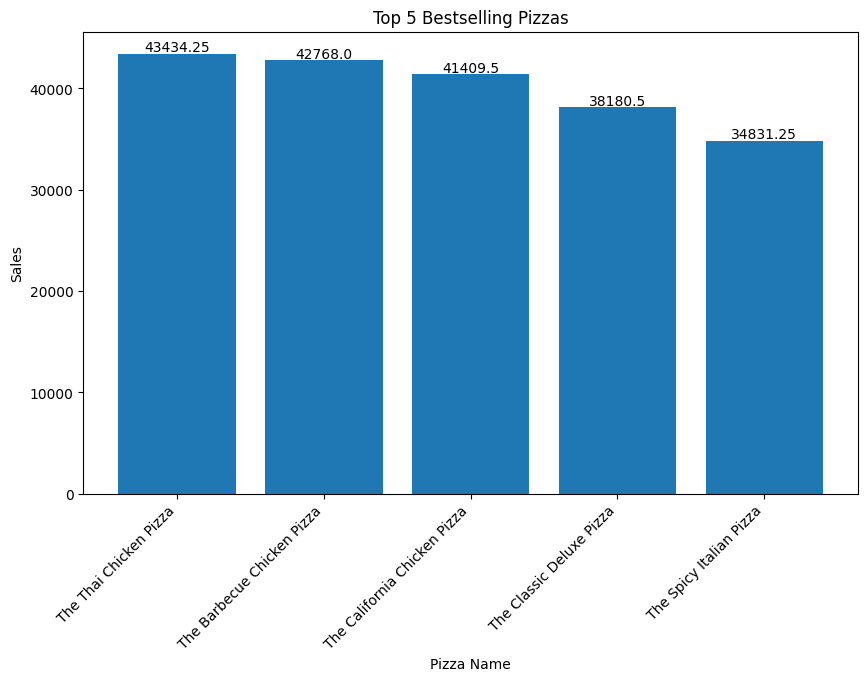

In [42]:
# Calculate total sales per pizza type
sales_by_pizza_type = df.groupby('name')['sales'].sum().reset_index()

# Get top 5 pizzas by sales
top_5_pizzas = sales_by_pizza_type.sort_values(by='sales', ascending=False).head(5)

# Calculate percentage for each of the top 5 pizzas
top_5_pizzas['percentage'] = (top_5_pizzas['sales'] / total_revenue * 100).round(1)

# Print results
print(f"The five bestselling pizzas are: \n{top_5_pizzas['name'].tolist()}\n")
print("With their sales percentages:")
print(top_5_pizzas[['name', 'sales', 'percentage']])
plt.figure(figsize=(10, 6))
plt.bar(top_5_pizzas['name'], top_5_pizzas['sales'])
plt.xlabel('Pizza Name')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Sales')
plt.title('Top 5 Bestselling Pizzas')
for i, value in enumerate(top_5_pizzas['sales']):
   plt.text(i, value +200, str(value), ha = 'center')
plt.show()

The five bestselling pizzas are :


1.  The Thai Chicken Pizza
2.  The Barbecue Chicken Pizza
1.   The California Chicken Pizza
2.   The Classic Deluxe Pizza
1.   The Spicy Italian Pizza


##9. Sales per Month

month
July         72557.90
May          71402.75
March        70397.10
November     70395.35
January      69793.30
April        68736.80
August       68278.25
June         68230.20
February     65159.60
December     64701.15
September    64180.05
October      64027.60
Name: sales, dtype: float64


<ipython-input-26-ab11bf147602>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Sales_by_month = df.groupby('month')['sales'].sum()


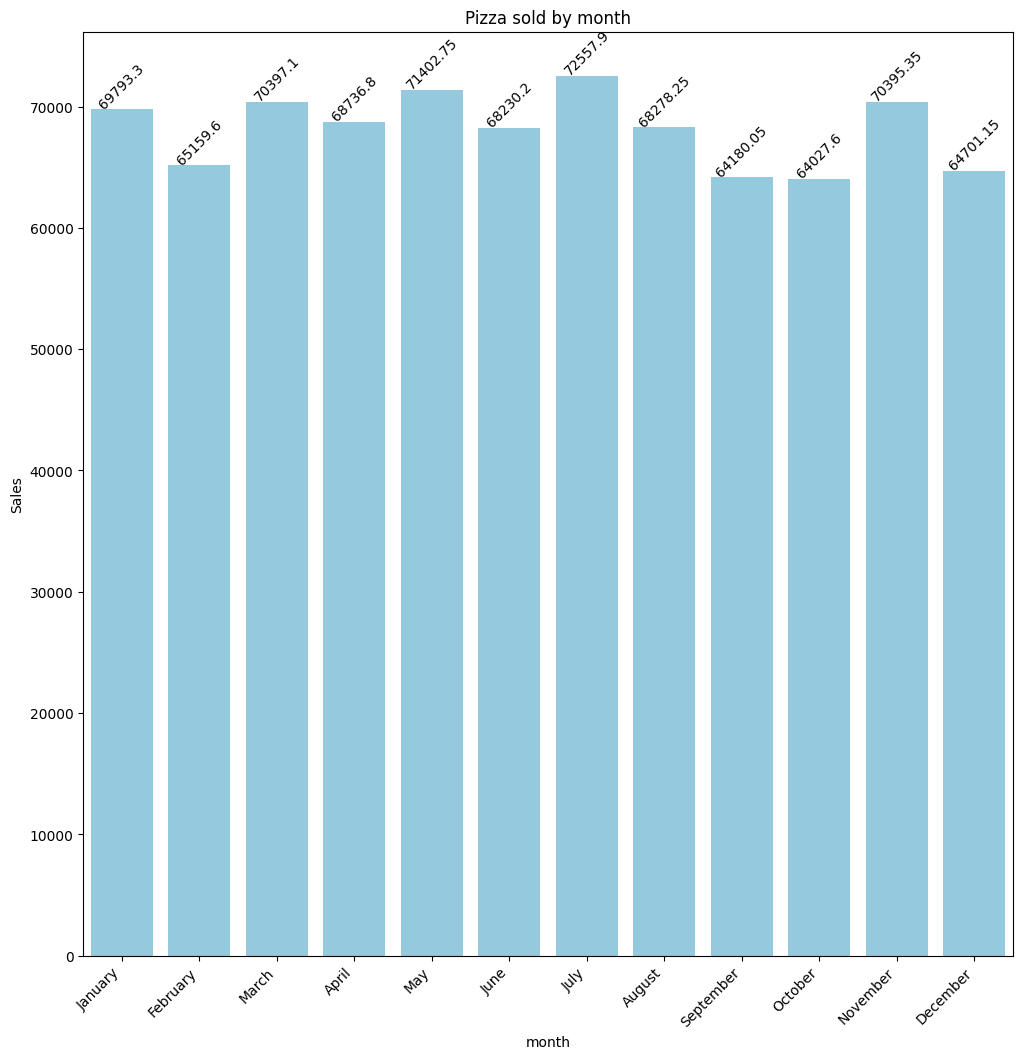

In [26]:
  Sales_by_month = df.groupby('month')['sales'].sum()
  print(Sales_by_month.sort_values(ascending=False)) # showing sale per month of week
  #plot bar graph to show results
  plt.figure(figsize = (12,12))
  sns.barplot(data = Sales_by_month, color = 'skyblue')
  plt.ylabel('Sales')
  plt.xticks(rotation = 45, ha = 'right')
  plt.title('Pizza sold by month')
  for i, value in enumerate(Sales_by_month):
    plt.text(i, value +100, str(value), ha = 'center',rotation = 45)
  plt.show()

July was the top performing month with $72,558 in sales, showing strong summer demand. October as the lowest month probably due to seasonal slowdowns. A potential solution to this can be to capitalise on Halloween season to drive sales.

The biggest drop happened between July and August indicating a need for strategies to sustain post peak demand. In postive light, February to March showed a large gain in sales highlighting success factors like seasonal menus and offers.

To improve overall results, replicating July's success in other high performing month and create special promotions for winter period.

##10. Bad performing Pizza types

The ten worst performing pizzas are: 
['The Brie Carre Pizza', 'The Green Garden Pizza', 'The Spinach Supreme Pizza', 'The Mediterranean Pizza', 'The Spinach Pesto Pizza', 'The Calabrese Pizza', 'The Italian Vegetables Pizza', 'The Soppressata Pizza', 'The Chicken Pesto Pizza', 'The Chicken Alfredo Pizza']

With their sales percentages:
                        name    sales  percentage
        The Brie Carre Pizza 11588.50        1.42
      The Green Garden Pizza 13955.75        1.71
   The Spinach Supreme Pizza 15277.75        1.87
     The Mediterranean Pizza 15360.50        1.88
     The Spinach Pesto Pizza 15596.00        1.91
         The Calabrese Pizza 15934.25        1.95
The Italian Vegetables Pizza 16019.25        1.96
       The Soppressata Pizza 16425.75        2.01
     The Chicken Pesto Pizza 16701.75        2.04
   The Chicken Alfredo Pizza 16900.25        2.07


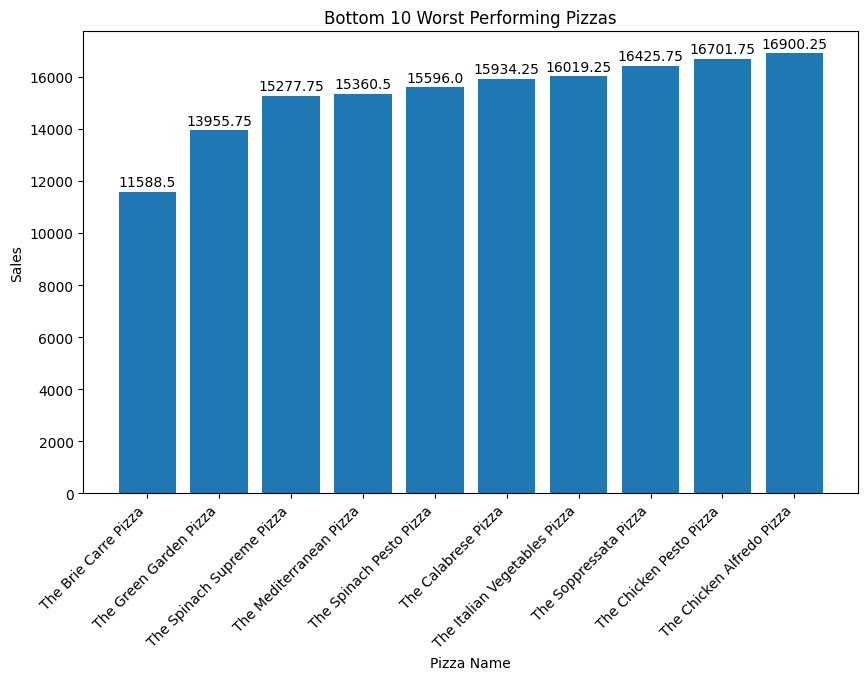

In [54]:
# Calculate total sales per pizza type
sales_by_pizza_type = df.groupby('name')['sales'].sum().reset_index()

# Get bottom 10 pizzas by sales (worst performing)
bottom_10_pizzas = sales_by_pizza_type.sort_values(by='sales', ascending=True).head(10)

# Calculate percentage for each of the bottom 10 pizzas
bottom_10_pizzas['percentage'] = (bottom_10_pizzas['sales'] / total_revenue * 100).round(2)

# Print results
print(f"The ten worst performing pizzas are: \n{bottom_10_pizzas['name'].tolist()}\n")
print("With their sales percentages:")
print(bottom_10_pizzas[['name', 'sales', 'percentage']].to_string(index=False))
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_pizzas['name'], bottom_10_pizzas['sales'])
plt.xlabel('Pizza Name')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Sales')
plt.title('Bottom 10 Worst Performing Pizzas')
for i, value in enumerate(bottom_10_pizzas['sales']):
   plt.text(i, value +200, str(value), ha = 'center')
plt.show()

These are 10 bad performing pizzas



1.   The Brie Carre Pizza
2.   The Green Garden Pizza
3. The Spinach Supreme Pizza
4. The Mediterranean Pizza
5. The Spinach Pesto Pizza
6. The Calabrese Pizza
7. The Italian Vegetables Pizza
8. The Soppressata Pizza
9. The Chicken Pesto Pizza
10. The Chicken Alfredo Pizza



##11. Sales by Pizza Size

In [48]:
# Calculate total sales by size
sales_by_size = df.groupby('size')['sales'].sum().reset_index()

# Add percentage column and sort
sales_by_size['percentage'] = (sales_by_size['sales'] / total_revenue * 100).round(1)
sales_by_size_sorted = sales_by_size.sort_values('sales', ascending=False)

# Print results
print("Pizza sizes ranked by sales performance:")
print(sales_by_size_sorted[['size', 'sales', 'percentage']].to_string(index=False))

print(f"\nAll pizza sizes offered: \n{sales_by_size['size'].tolist()}")

Pizza sizes ranked by sales performance:
size     sales  percentage
   L 375318.70        45.9
   M 249382.25        30.5
   S 178076.50        21.8
  XL  14076.00         1.7
 XXL   1006.60         0.1

All pizza sizes offered: 
['L', 'M', 'S', 'XL', 'XXL']


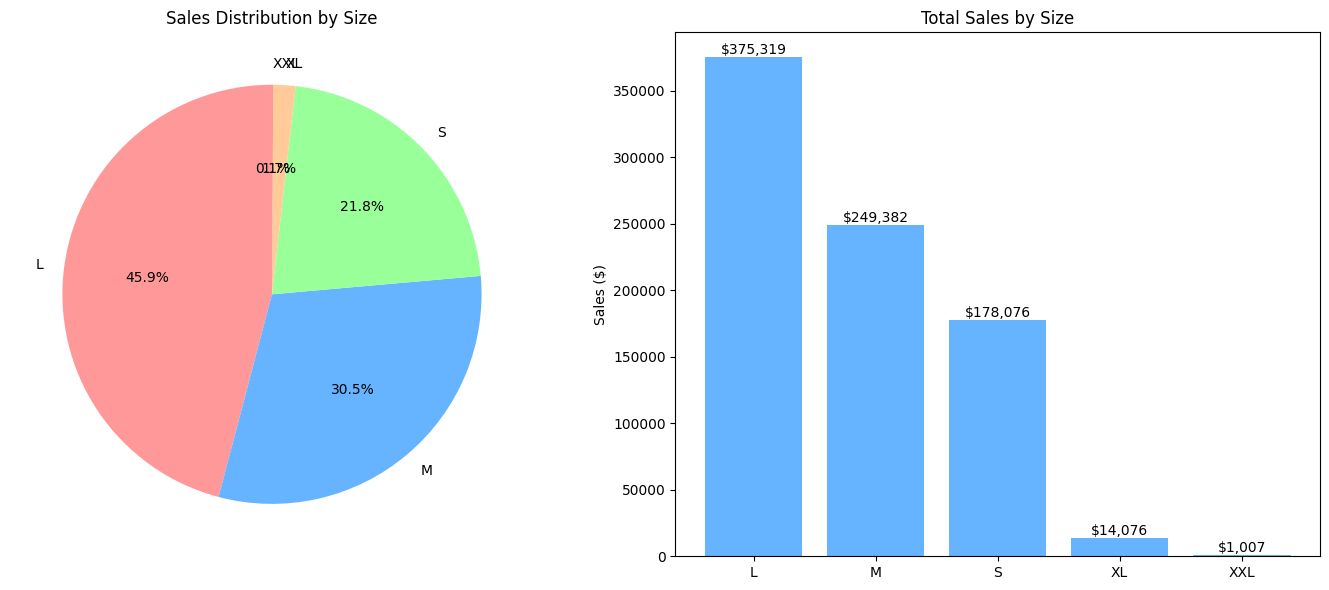

In [47]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart (percentage distribution)
ax1.pie(sales_by_size_sorted['percentage'],
        labels=sales_by_size_sorted['size'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
ax1.set_title('Sales Distribution by Size')

# Bar chart (absolute values)
bars = ax2.bar(sales_by_size_sorted['size'], sales_by_size_sorted['sales'], color='#66b3ff')
ax2.set_title('Total Sales by Size')
ax2.set_ylabel('Sales ($)')

# Add value labels to bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

Customers prefer Large size to other sizes (45.9%)

##12. Sales by category

Pizza categories ranked by sales performance:
category     sales  percentage
 Classic 220053.10        26.9
 Supreme 208197.00        25.5
 Chicken 195919.50        24.0
  Veggie 193690.45        23.7

All pizza categories offered: 
['Chicken', 'Classic', 'Supreme', 'Veggie']


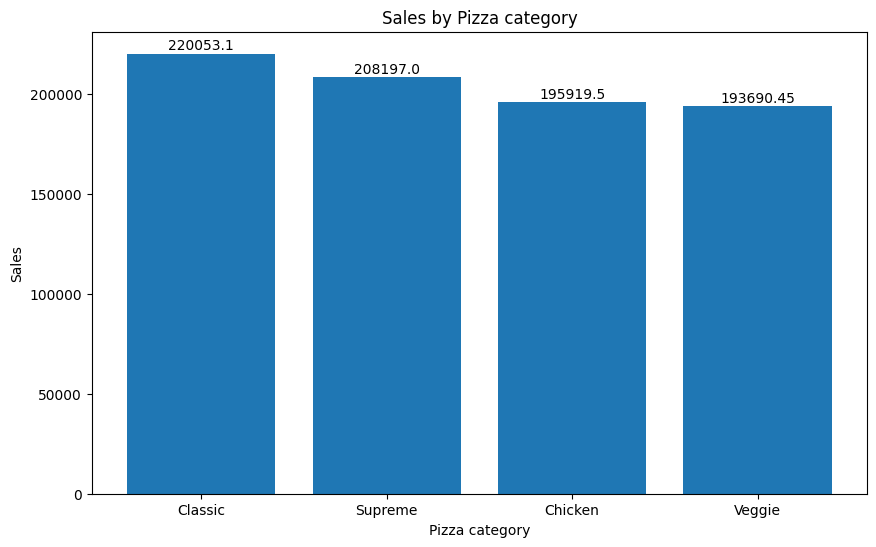

In [45]:
# Calculate total sales by category
sales_by_category = df.groupby('category')['sales'].sum().reset_index()

# Add percentage column
sales_by_category['percentage'] = (sales_by_category['sales'] / total_revenue * 100).round(1)

# Sort by sales (descending)
sales_by_category_sorted = sales_by_category.sort_values(by='sales', ascending=False)

# Print results
print("Pizza categories ranked by sales performance:")
print(sales_by_category_sorted[['category', 'sales', 'percentage']].to_string(index=False))

# Get just the category names
print(f"\nAll pizza categories offered: \n{sales_by_category['category'].tolist()}")
plt.figure(figsize=(10, 6))
plt.bar(sales_by_category_sorted['category'], sales_by_category_sorted['sales'])
plt.xlabel('Pizza category')
plt.ylabel('Sales')
plt.title('Sales by Pizza category')
for i, value in enumerate(sales_by_category_sorted['sales']):
   plt.text(i, value +2000, str(value), ha = 'center')
plt.show()

Most people prefer Classic pizza